## Analyse datas bellesdemeures.com

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_full = pd.read_csv("immos_bx_2020-01-19.csv")

In [3]:
data_full.shape

(744, 13)

In [4]:
data_full.describe()

,surface,field_surface,rooms,bedrooms,balcony,parking
count,740.000000,2.760000e+02,732.000000,736.000000,100.000000,166.000000
mean,246.082432,4.499175e+04,6.900273,4.230978,1.170000,2.265060
std,258.447855,1.437938e+05,3.863208,2.082232,0.472582,3.191216
min,56.000000,2.200000e+01,2.000000,1.000000,1.000000,1.000000
25%,126.750000,1.990000e+02,5.000000,3.000000,1.000000,1.000000
50%,172.000000,5.450000e+02,6.000000,4.000000,1.000000,2.000000
75%,260.000000,9.850000e+03,8.000000,5.000000,1.000000,2.000000
max,3200.000000,1.200000e+06,30.000000,19.000000,4.000000,36.000000


In [5]:
data_full.head()

,typeof,price,surface,field_surface,rooms,bedrooms,terrace,balcony,pool,parking,localisation,agency,link
0,Hôtel particulier,1 596 500,315.0,220.0,10.0,6.0,NON,1.0,OUI,1.0,Bordeaux,GOOD WEEK,https://www.bellesdemeures.com/annonces/vente/...
1,Maison / Villa,1 400 000,250.0,270.0,7.0,5.0,NON,NaN,OUI,NaN,Bordeaux,MOVEMENT,https://www.bellesdemeures.com/annonces/vente/...
2,Appartement,693 000,102.0,NaN,3.0,2.0,NON,1.0,NON,NaN,Bordeaux,GRANGE DELMAS IMMOBILIER,https://www.bellesdemeures.com/annonces/vente/...
3,Maison / Villa,598 000,140.0,50.0,5.0,3.0,NON,NaN,NON,NaN,Bordeaux,BORDEAUX AND BEYOND,https://www.bellesdemeures.com/annonces/vente/...
4,Maison / Villa,1 325 000,740.0,15483.0,21.0,8.0,NON,NaN,OUI,NaN,Bordeaux,BORDEAUX AND BEYOND,https://www.bellesdemeures.com/annonces/vente/...


In [6]:
columns = data_full.columns.values
columns

array(['typeof', 'price', 'surface', 'field_surface', 'rooms', 'bedrooms',
       'terrace', 'balcony', 'pool', 'parking', 'localisation', 'agency',
       'link'], dtype=object)

In [7]:
data_full.dtypes

typeof            object
price             object
surface          float64
field_surface    float64
rooms            float64
bedrooms         float64
terrace           object
balcony          float64
pool              object
parking          float64
localisation      object
agency            object
link              object
dtype: object

La colonne price est considérée comme non numérique , il faut changer son format

### Analyse price et modification type colonne
 Modification du format des prix , changement de la colonne price en numerique et distribution

In [8]:
# De 1,7M à 3M
# + de 10M
# De 3M à 10M
# De 3M à 10M

data_full.loc[data_full['price'] == 'De 1,7M à 3M', 'price'] = (1700000+3000000)/2
data_full.loc[data_full['price'] == '+ de 10M', 'price'] = 10000000
data_full.loc[data_full['price'] == 'De 3M à 10M', 'price'] = (3000000+10000000)/2

In [9]:
# les prix sont sous la forme 1 590 000 , on enleve les espaces
data_full['price'] = data_full['price'].replace('\s+', '', regex=True)
data_full['price']

0      1596500
1      1400000
2       693000
3       598000
4      1325000
        ...   
739    1415000
740    1250000
741    1200000
742    1200000
743     997500
Name: price, Length: 744, dtype: object

In [10]:
data_full['price'] = pd.to_numeric(data_full['price'])

In [11]:
data_full['price'].dtypes

dtype('float64')

In [12]:
data_full.price.isna().sum()

0

In [13]:
data_full['price'].describe()

count    7.440000e+02
mean     1.182056e+06
std      9.898925e+05
min      3.990000e+05
25%      7.139000e+05
50%      8.955000e+05
75%      1.325000e+06
max      1.600000e+07
Name: price, dtype: float64

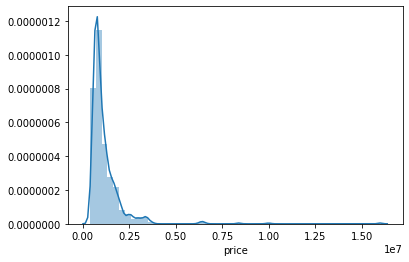

In [14]:
sns.distplot(data_full['price'])

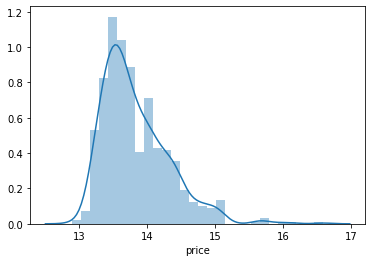

In [15]:
data_full['price'] = np.log(data_full['price'])
sns.distplot(data_full['price'])

### Division des datas en valeurs numériques ( quantitative ) et catégorielles ( qualititative ) 

In [16]:
data_full.dtypes

typeof            object
price            float64
surface          float64
field_surface    float64
rooms            float64
bedrooms         float64
terrace           object
balcony          float64
pool              object
parking          float64
localisation      object
agency            object
link              object
dtype: object

In [17]:
qual = data_full.select_dtypes(include=['object']).columns
print(qual)

Index(['typeof', 'terrace', 'pool', 'localisation', 'agency', 'link'], dtype='object')


In [18]:
quan = data_full.select_dtypes(include=['int64','float64']).columns
quan = quan.drop(pd.Index(['price']))
print(quan)

Index(['surface', 'field_surface', 'rooms', 'bedrooms', 'balcony', 'parking'], dtype='object')


In [19]:
print(f"{len(qual)} catégorielles et {len(quan)} numériques")

6 catégorielles et 6 numériques


In [20]:
corrmat = data_full.corr()
corrmat

,price,surface,field_surface,rooms,bedrooms,balcony,parking
price,1.000000,0.694578,0.475977,0.641703,0.537328,-0.046074,0.407087
surface,0.694578,1.000000,0.601611,0.793105,0.666939,-0.061678,0.351546
field_surface,0.475977,0.601611,1.000000,0.456165,0.331146,0.036158,0.404397
rooms,0.641703,0.793105,0.456165,1.000000,0.786375,-0.016083,0.416682
bedrooms,0.537328,0.666939,0.331146,0.786375,1.000000,0.002229,0.143176
balcony,-0.046074,-0.061678,0.036158,-0.016083,0.002229,1.000000,-0.180267
parking,0.407087,0.351546,0.404397,0.416682,0.143176,-0.180267,1.000000


## Analyse features numériques

In [21]:
data_full.shape

(744, 13)

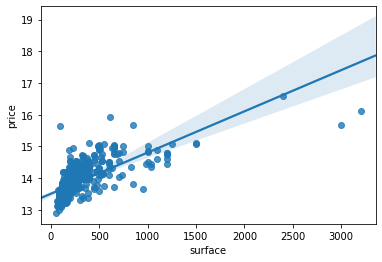

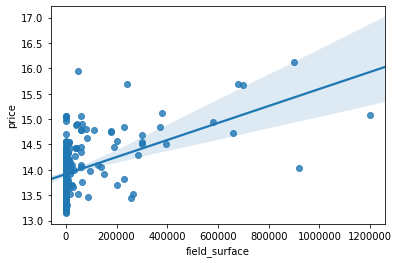

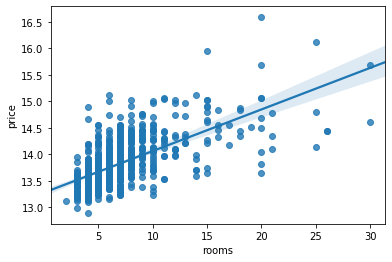

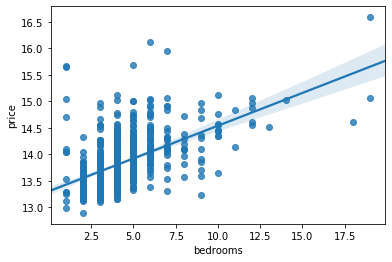

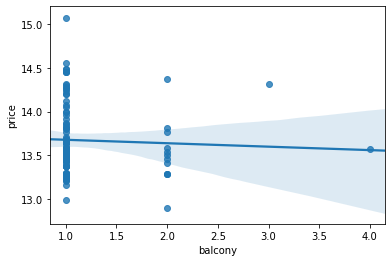

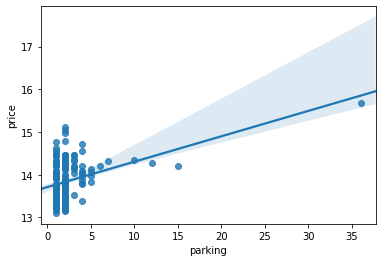

In [22]:
for feature in data_full[quan]:
    sns.regplot(x=feature,y='price', data=data_full)
    plt.show()

### Certaines features semblent avoir des outliers , Analyse une par une

* #### Surface


corr : 0.69


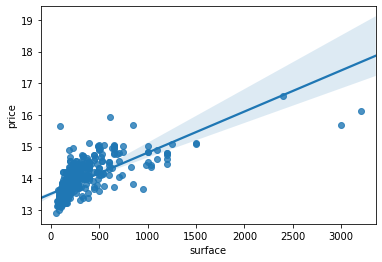

In [23]:
sns.regplot(x='surface',y='price', data=data_full)
print(f"corr : {round(data_full['surface'].corr(data_full['price']),2)}")

corr : 0.71


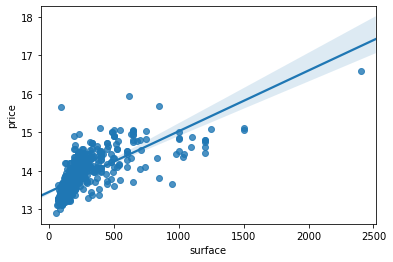

In [24]:
data_full = data_full.drop(data_full[(data_full['surface']>2900)].index).reset_index(drop=True)
sns.regplot(x='surface',y='price', data=data_full)
print(f"corr : {round(data_full['surface'].corr(data_full['price']),2)}")

In [25]:
data_full.shape

(742, 13)

* #### Field_surface

corr : 0.39


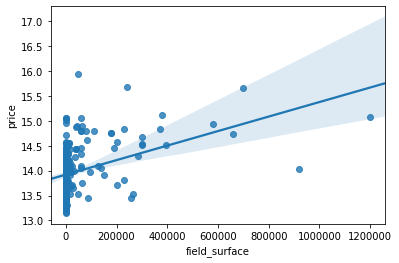

In [26]:
sns.regplot(x='field_surface',y='price', data=data_full)
print(f"corr : {round(data_full['field_surface'].corr(data_full['price']),2)}")

corr : 0.43


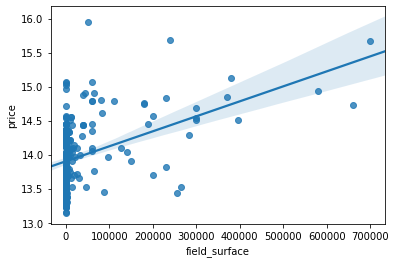

In [27]:
data_full = data_full.drop(data_full[(data_full['field_surface']>800000)].index).reset_index(drop=True)
sns.regplot(x='field_surface',y='price', data=data_full)
print(f"corr : {round(data_full['field_surface'].corr(data_full['price']),2)}")

On a supprimé 4 outliers

## Traitement des valeurs manquantes dans le dataset

In [28]:
data_full.shape

(740, 13)

In [29]:
def hasnan(dataset):
    hasNAN = round((dataset.isnull().sum() / len(dataset)) * 100,2)  # toutes les features et leurs nombres de zéros ( % )
    hasNAN = hasNAN[hasNAN > 0] # On enleve celles qui n'ont pas de valeurs nulles 
    hasNAN = hasNAN.sort_values(ascending=False)
    missing_values = pd.DataFrame({'Missing Ratio': hasNAN})
    return missing_values

In [30]:
hasnan(data_full)

,Missing Ratio
balcony,86.49
parking,77.57
field_surface,63.24
rooms,1.49
bedrooms,0.81
surface,0.54


### field_surface

In [31]:
data_full['field_surface'].isnull().sum()

468

63% des biens n'ont pas de surface du terrain renseigné , certains sont des appartements

In [32]:
app_surface_null = data_full.loc[(data_full['typeof'] == 'Appartement') & (data_full['field_surface'].isnull())]
len(app_surface_null)

290

In [33]:
other_surface_null = data_full.loc[(data_full['typeof'] != 'Appartement') & (data_full['field_surface'].isnull())]
len(other_surface_null)

178

178 batiments qui ne sont pas des appartements n'ont pas de surface indiqués , peut etre qu'ils ont un terrain mais dont la taille n'est pas indiquée. On va mettre tout a " None " étant donné que les terrains qui sont indiqués sont énormes , la moyenne ne devrait pas refleter une réalitée

### rooms
Analyse des biens dont le nombre de pièces n'est pas précisé

In [34]:
rooms_na = data_full.loc[data_full['rooms'].isnull()]
len(rooms_na)

11

In [35]:
data_full.shape

(740, 13)

Les biens dont le nombre de pièces n'est pas précisés et dont le prix de vente est important sont supprimés pour ne pas influer le modele ( ex : 1 piece , prix important ) , et on voit en parcourant certaines annonces que les biens ont 1 pièce

In [36]:
print(data_full.iloc[322]['link']) # 1 piece 
print(data_full.iloc[326]['link']) # On vire 1 piece 3.5M
print(data_full.iloc[399]['link']) # 1 Piece 
print(data_full.iloc[442]['link']) # NA , trop cher , on vire 
print(data_full.iloc[446]['link']) # NA , trop cher , on vire 
print(data_full.iloc[472]['link']) # NA , trop cher , on vire 
print(data_full.iloc[505]['link']) # 1 piece 
print(data_full.iloc[509]['link']) # NA , trop cher , on vire 
print(data_full.iloc[690]['link']) # NA , on vire 
print(data_full.iloc[696]['link']) # NA , trop cher , on vire 
print(data_full.iloc[714]['link']) # NA , trop cher , on vire 


https://www.bellesdemeures.com/annonces/vente/tt-2-tb-1-pl-48327/153438049/
https://www.bellesdemeures.com/annonces/vente/tt-2-tb-14-pl-48327/153462833/
https://www.bellesdemeures.com/annonces/vente/tt-2-tb-2-pl-48321/151313183/
https://www.bellesdemeures.com/annonces/vente/tt-2-tb-2-pl-48321/136016827/
https://www.bellesdemeures.com/annonces/vente/tt-2-tb-2-pl-48321/151568733/
https://www.bellesdemeures.com/annonces/vente/tt-2-tb-2-pl-48323/154950027/
https://www.bellesdemeures.com/annonces/vente/tt-2-tb-2-pl-48322/144680989/
https://www.bellesdemeures.com/annonces/vente/tt-2-tb-2-pl-48321/155354337/
https://www.bellesdemeures.com/annonces/vente/tt-2-tb-2-pl-13950/154297815/
https://www.bellesdemeures.com/annonces/vente/tt-2-tb-13-pl-13950/144014585/
https://www.bellesdemeures.com/annonces/vente/tt-2-tb-13-pl-13950/144015353/


In [37]:
data_full.iloc[322, data_full.columns.get_loc('rooms')] = 1
data_full.iloc[399, data_full.columns.get_loc('rooms')] = 1
data_full.iloc[505, data_full.columns.get_loc('rooms')] = 1

data_full = data_full.drop([326,442,446,472,509,690,696,714], axis=0)
data_full.shape


(732, 13)

### bedrooms
Analyse des biens dont le nombre de chambres n'est pas précisés

In [38]:
bedrooms_na = data_full.loc[data_full['bedrooms'].isnull()]
len(bedrooms_na)

5

In [45]:
bedrooms_na

,typeof,price,surface,field_surface,rooms,bedrooms,terrace,balcony,pool,parking,localisation,agency,link
322,Appartement,13.112313,73.0,NaN,1.0,NaN,OUI,NaN,NON,NaN,Bordeaux,Barnes Bordeaux,https://www.bellesdemeures.com/annonces/vente/...
435,Appartement,13.287878,110.0,NaN,4.0,NaN,NON,NaN,NON,NaN,Bordeaux,SCOUT HOME,https://www.bellesdemeures.com/annonces/vente/...
666,Appartement,13.195614,120.0,NaN,6.0,NaN,NON,NaN,NON,NaN,Bordeaux,MENA IMMOBILIER,https://www.bellesdemeures.com/annonces/vente/...
671,Hôtel particulier,13.883169,240.0,NaN,8.0,NaN,NON,NaN,NON,NaN,Bordeaux,MENA IMMOBILIER,https://www.bellesdemeures.com/annonces/vente/...
708,Hôtel particulier,15.017882,1000.0,NaN,12.0,NaN,NON,NaN,NON,NaN,Bordeaux,Agence immobilière du Grand-Théâtre,https://www.bellesdemeures.com/annonces/vente/...


In [40]:
print(data_full.iloc[322]['link']) # 1 chambre 
print(data_full.iloc[435]['link']) # 2 
print(data_full.iloc[666]['link']) # 1 chambre 
print(data_full.iloc[671]['link']) # Pas de renseignement sur les chambres.
print(data_full.iloc[708]['link']) # 12 Pieces mais pas de renseignement sur les chambres 

https://www.bellesdemeures.com/annonces/vente/tt-2-tb-1-pl-48327/153438049/
https://www.bellesdemeures.com/annonces/vente/tt-2-tb-2-pl-48321/152946981/
https://www.bellesdemeures.com/annonces/vente/tt-2-tb-14-pl-13950/149257533/
https://www.bellesdemeures.com/annonces/vente/tt-2-tb-1-pl-13950/144293729/
https://www.bellesdemeures.com/annonces/vente/tt-2-tb-2-pl-13950/152796083/


In [41]:
def remplace_na(dataset):
    dataset["balcony"] = dataset["balcony"].fillna("None")
    dataset["parking"] = dataset["parking"].fillna("None")
    dataset["field_surface"] = dataset["field_surface"].fillna("None")
    return dataset

## Type de bien

In [42]:
data_full.typeof.value_counts()

Maison / Villa          394
Appartement             290
Château                  28
Hôtel particulier        12
Loft/Atelier/Surface      8
Name: typeof, dtype: int64

In [43]:
#Moyenne de la surface des biens de type "Maison/Villa"
meansur_house =  data_full.loc[data_full['typeof'] == 'Maison / Villa']['surface'].mean()
meansur_apartment =  data_full.loc[data_full['typeof'] == 'Appartement']['surface'].mean()
meansur_castle =  data_full.loc[data_full['typeof'] == 'Château']['surface'].mean()
meansur_hostel =  data_full.loc[data_full['typeof'] == 'Hôtel particulier']['surface'].mean()
meansur_loft =  data_full.loc[data_full['typeof'] == 'Loft/Atelier/Surface']['surface'].mean()

In [44]:
print(f"Surface moyenne des maisons : {round(meansur_house,2)}")
print(f"Surface moyenne des appartements : {round(meansur_apartment,2)}")
print(f"Surface moyenne des chateaux : {round(meansur_castle,2)}")
print(f"Surface moyenne des hotels particuliers : {round(meansur_hostel,2)}")
print(f"Surface moyenne des lofts : {round(meansur_loft,2)}")

Surface moyenne des maisons : 256.3
Surface moyenne des appartements : 136.11
Surface moyenne des chateaux : 805.86
Surface moyenne des hotels particuliers : 538.33
Surface moyenne des lofts : 222.12
